In [1]:
%load_ext autoreload

%autoreload 2

import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

In [2]:
seed   = 1005
n      = 512
degree = 1
nknots = 10
strue  = 0.5 
knots  = np.linspace(0, 1, nknots+2)[1:-1]
x      = np.linspace(0, 1, n)
data   = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree,
                signal = "normal", seed = seed, include_intercept = False)

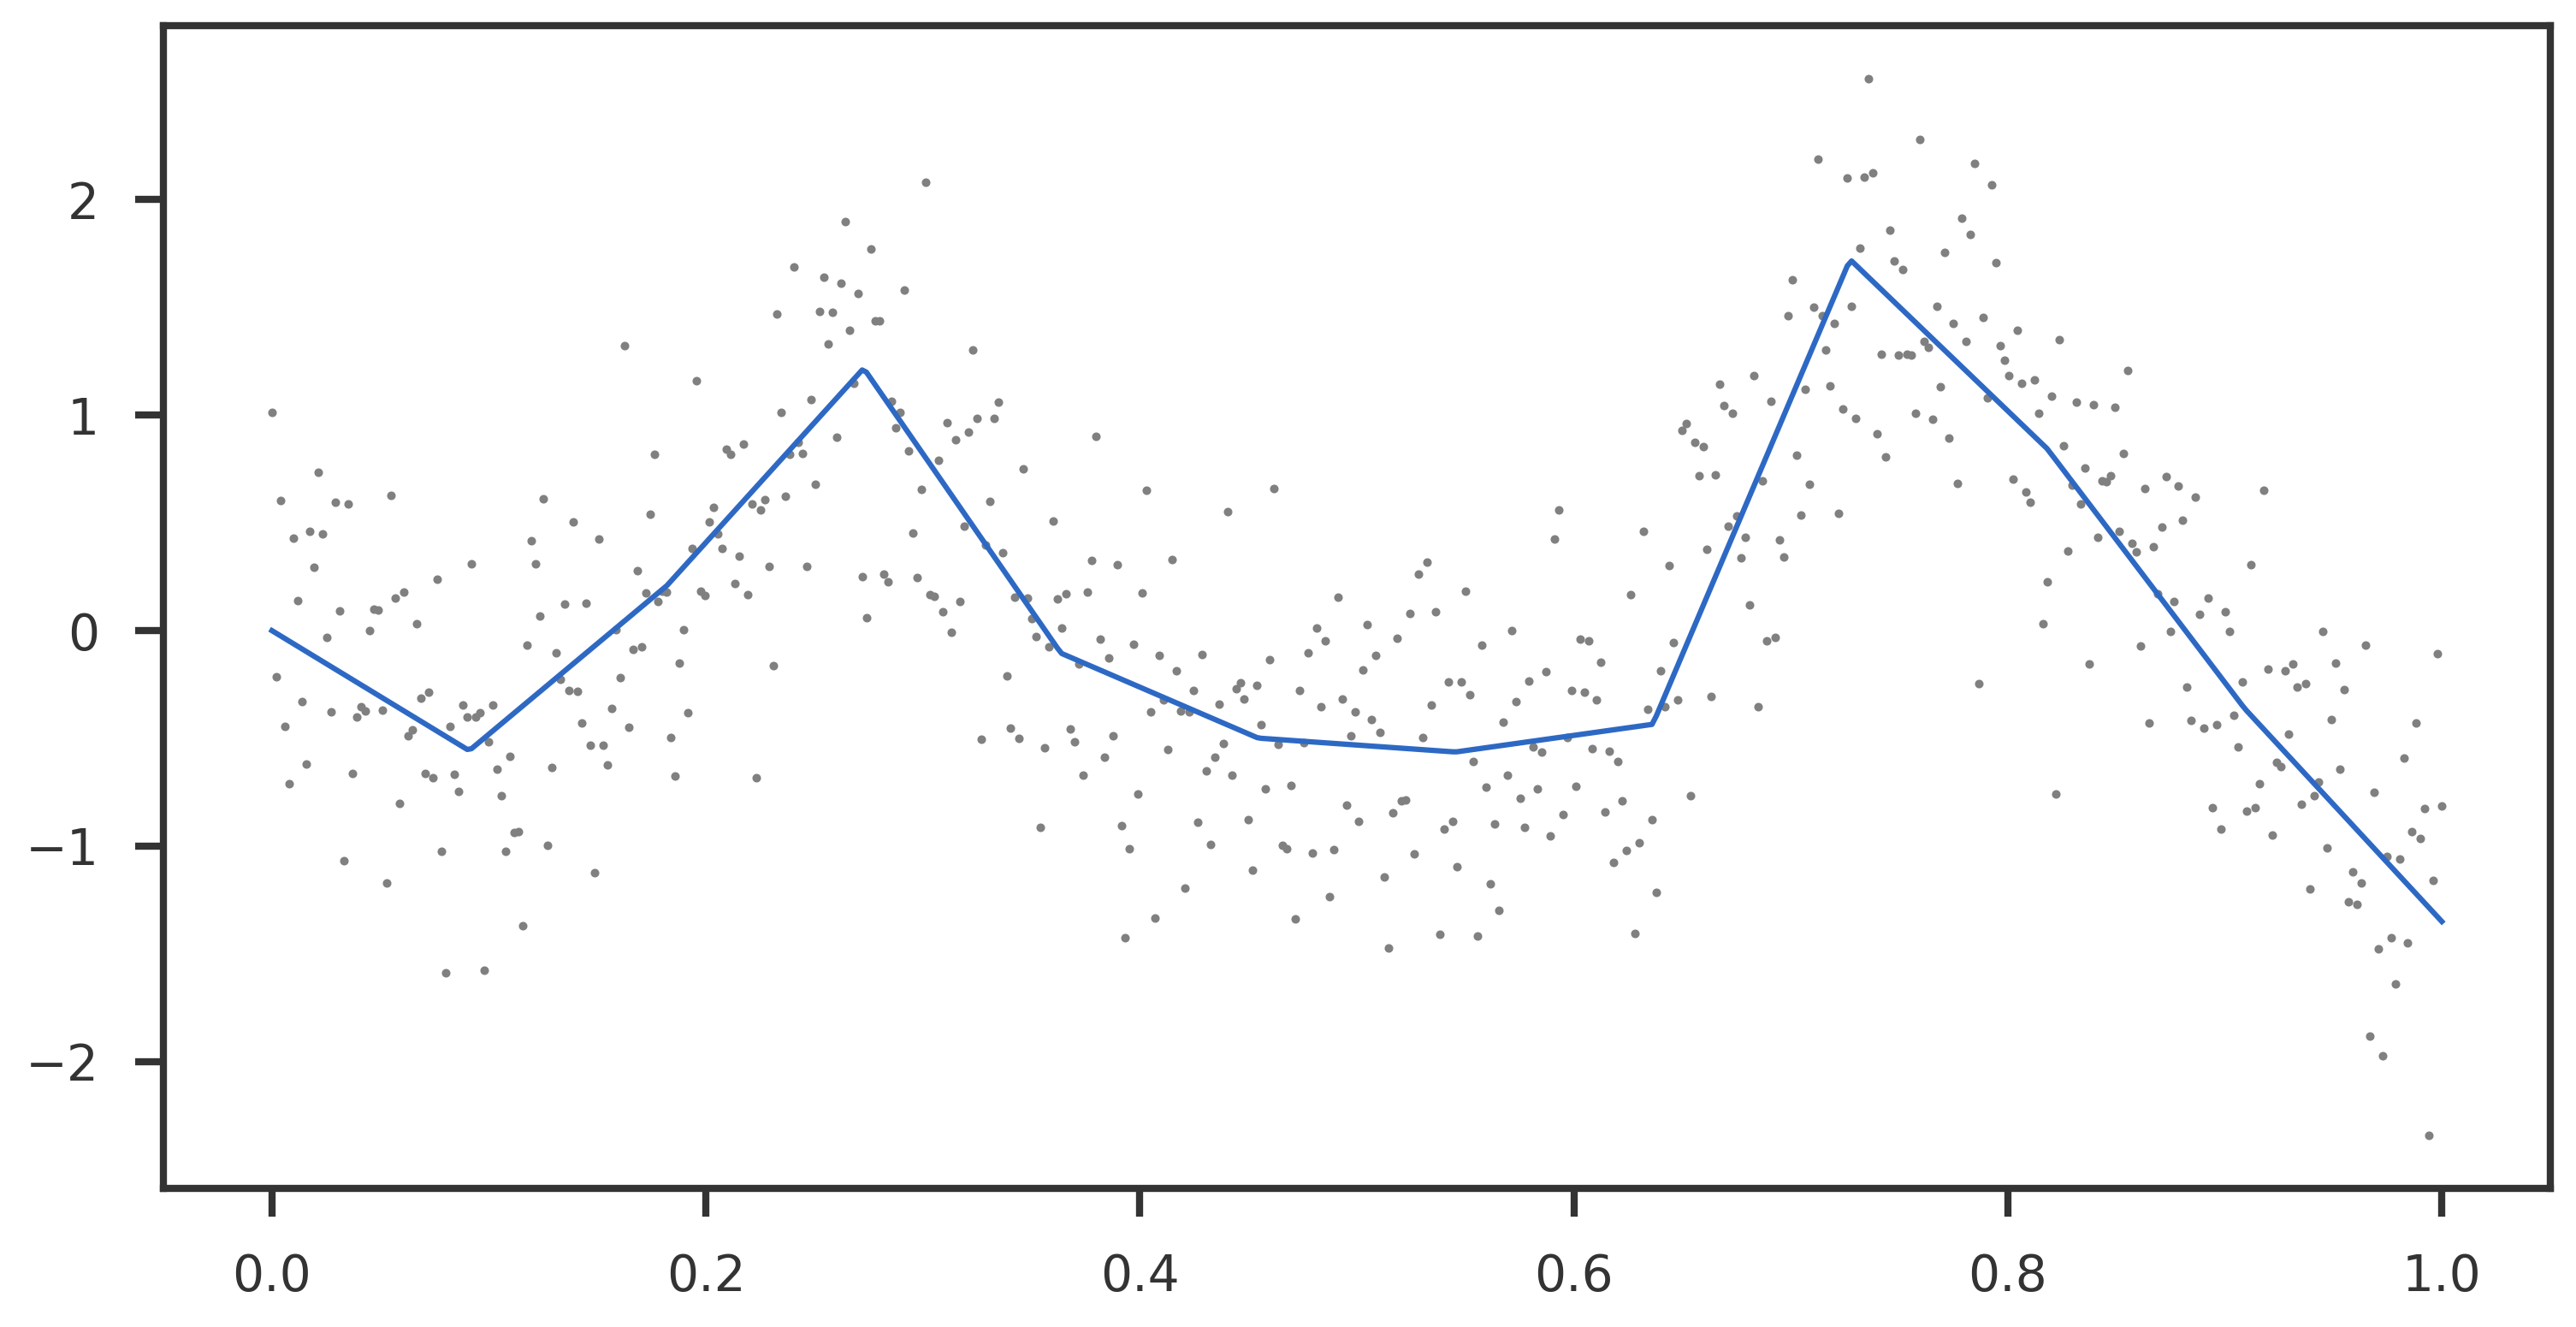

In [3]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(data.x, data.y, s = 2, color = 'grey')
ax1.plot(data.x, data.ytrue)
plt.show()

In [4]:
prior = toy_priors.get_ash_scaled(k = 20, sparsity = 0.9, skbase = 20)

In [5]:
import gradvi

In [6]:
# %%debug

gv = Trendfiltering(maxiter = 200, obj = 'direct', scale_tfbasis = True)
gv.fit(data.y, data.degree, prior)

2022-11-10 19:05:19,271 | gradvi.optimize.root_find                | WARNING | ygrid is not strictly increasing. Removing grid points.


In [7]:
import sys
sys.path

['/home/saikat/Documents/work/sparse-regression/mr-ash-penalized/notebooks/trendfiltering_examples',
 '/opt/saikat/python-envs/py39/lib/python39.zip',
 '/opt/saikat/python-envs/py39/lib/python3.9',
 '/opt/saikat/python-envs/py39/lib/python3.9/lib-dynload',
 '',
 '/opt/saikat/python-envs/py39/lib/python3.9/site-packages',
 '/home/saikat/Documents/work/sparse-regression/ebmrPy/src',
 '/home/saikat/Documents/work/packages/python/pymir/src',
 '/home/saikat/Documents/work/packages/python/cpydemo/src',
 '/home/saikat/Documents/work/packages/python/fpydemo/src',
 '/home/saikat/Documents/work/sparse-regression/mr-ash-penalized/mr-ash-pen/src',
 '/home/saikat/Documents/work/packages/python/pyfactory/src',
 '/home/saikat/Documents/work/sparse-regression/gradvi/src',
 '/opt/saikat/python-envs/py39/lib/python3.9/site-packages/IPython/extensions',
 '/home/saikat/.ipython']

b gradvi/inference/linear_regression.py:439

In [8]:
# binvobj = vec_root(self._f_jac_inv, x0, method = method, fx = bpos, bounds = xbounds, options = options)
# 